# **Heart Disease Prediction**

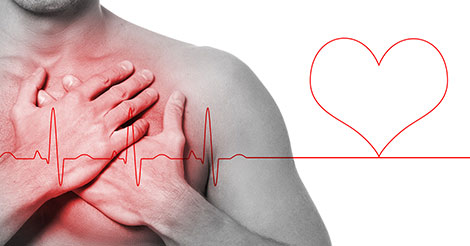

Image Source :https://www.indushealthplus.com/heart-diseases.html


### OBJECTIVE:

1.   Explore the most common features associated with the heart disease risks
2. Create a classification model to predict Heart Disease




**HeartDisease** : Respondents that have ever reported having coronary heart disease (CHD) or myoc

**BMI** : Body Mass Index (BMI)

**Smoking** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]

**AlcoholDrinking** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

**Stroke** : (Ever told) (you had) a stroke?

**PhysicalHealth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30

**MentalHealth** : Thinking about your mental health, for how many days during the past 30 days was your mental health not good?

**DiffWalking** : Do you have serious difficulty walking or climbing stairs?

**Sex** : Are you male or female?

**AgeCategory** : Fourteen-level age category

**Race** : Imputed race/ethnicity value

**Diabetic** : Ever told) (you had) diabetes?

**PhysicalActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job


**GenHealth** : Would you say that in general your health is...

**SleepTime** : On average, how many hours of sleep do you get in a 24-hour period?

**Asthma** : (Ever told) (you had) asthma?

**KidneyDisease** : Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

**SkinCancer** : (Ever told) (you had) skin cancer?

In [ ]:
#@title Imports
# Generic Imports, Plot Beautification

import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler,PowerTransformer, FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
import sklearn.metrics as metrics
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/heart_2020_cleaned.csv"
df = pd.read_csv(path)

In [ ]:
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
df1 = df.copy()
df_train, df_test = train_test_split(df1,test_size=0.2,random_state=42)
df_train.info()

dftrain = df_train.copy()
dftest = df_test.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255836 entries, 95877 to 121958
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      255836 non-null  object 
 1   BMI               255836 non-null  float64
 2   Smoking           255836 non-null  object 
 3   AlcoholDrinking   255836 non-null  object 
 4   Stroke            255836 non-null  object 
 5   PhysicalHealth    255836 non-null  float64
 6   MentalHealth      255836 non-null  float64
 7   DiffWalking       255836 non-null  object 
 8   Sex               255836 non-null  object 
 9   AgeCategory       255836 non-null  object 
 10  Race              255836 non-null  object 
 11  Diabetic          255836 non-null  object 
 12  PhysicalActivity  255836 non-null  object 
 13  GenHealth         255836 non-null  object 
 14  SleepTime         255836 non-null  float64
 15  Asthma            255836 non-null  object 
 16  KidneyDisease   

**Observation**
 We have no null values in  feature columns of the train dataset

In [ ]:
print('HeartDisease:' , dftrain['HeartDisease'].unique())
#print('BMI:' , dftrain['BMI'].unique())
print('Smoking:' , dftrain['Smoking'].unique())
print('AlcoholDrinking:' , dftrain['AlcoholDrinking'].unique())
print('Stroke:' , dftrain['Stroke'].unique())
#print('PhysicalHealth:' , dftrain['PhysicalHealth'].unique())
#print('MentalHealth:' , dftrain['MentalHealth'].unique())
print('DiffWalking:' , dftrain['DiffWalking'].unique())
print('Sex:' , dftrain['Sex'].unique())
print('AgeCategory:' , dftrain['AgeCategory'].unique())
print('Race:' , dftrain['Race'].unique())
print('Diabetic:' , dftrain['Diabetic'].unique())
print('PhysicalActivity:' , dftrain['PhysicalActivity'].unique())
print('GenHealth:' , dftrain['GenHealth'].unique())
#print('SleepTime:' , dftrain['SleepTime'].unique())
print('Asthma:' , dftrain['Asthma'].unique())
print('KidneyDisease:' , dftrain['KidneyDisease'].unique())
print('SkinCancer:' , dftrain['SkinCancer'].unique())

HeartDisease: ['No' 'Yes']
Smoking: ['Yes' 'No']
AlcoholDrinking: ['No' 'Yes']
Stroke: ['No' 'Yes']
DiffWalking: ['No' 'Yes']
Sex: ['Male' 'Female']
AgeCategory: ['75-79' '55-59' '50-54' '25-29' '80 or older' '30-34' '70-74' '40-44'
 '35-39' '18-24' '45-49' '60-64' '65-69']
Race: ['White' 'Hispanic' 'Black' 'Other' 'American Indian/Alaskan Native'
 'Asian']
Diabetic: ['No' 'Yes' 'Yes (during pregnancy)' 'No, borderline diabetes']
PhysicalActivity: ['Yes' 'No']
GenHealth: ['Very good' 'Good' 'Excellent' 'Fair' 'Poor']
Asthma: ['No' 'Yes']
KidneyDisease: ['No' 'Yes']
SkinCancer: ['No' 'Yes']


Text(0.5, 1.0, 'Distribution of Yes/No from Heart disease Feature column')

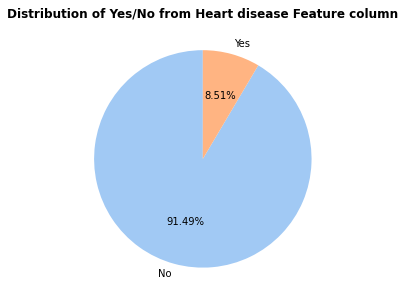

In [ ]:
plt.figure(figsize = (5,5))
colors = sns.color_palette('pastel')
df1 = pd.DataFrame(dftrain['HeartDisease'].value_counts().reset_index())
plt.pie(data=df1,x='HeartDisease',labels='index',startangle = 90, autopct='%.2f%%', colors = colors)
plt.title('Distribution of Yes/No from Heart disease Feature column',weight = 'bold', color = 'black')

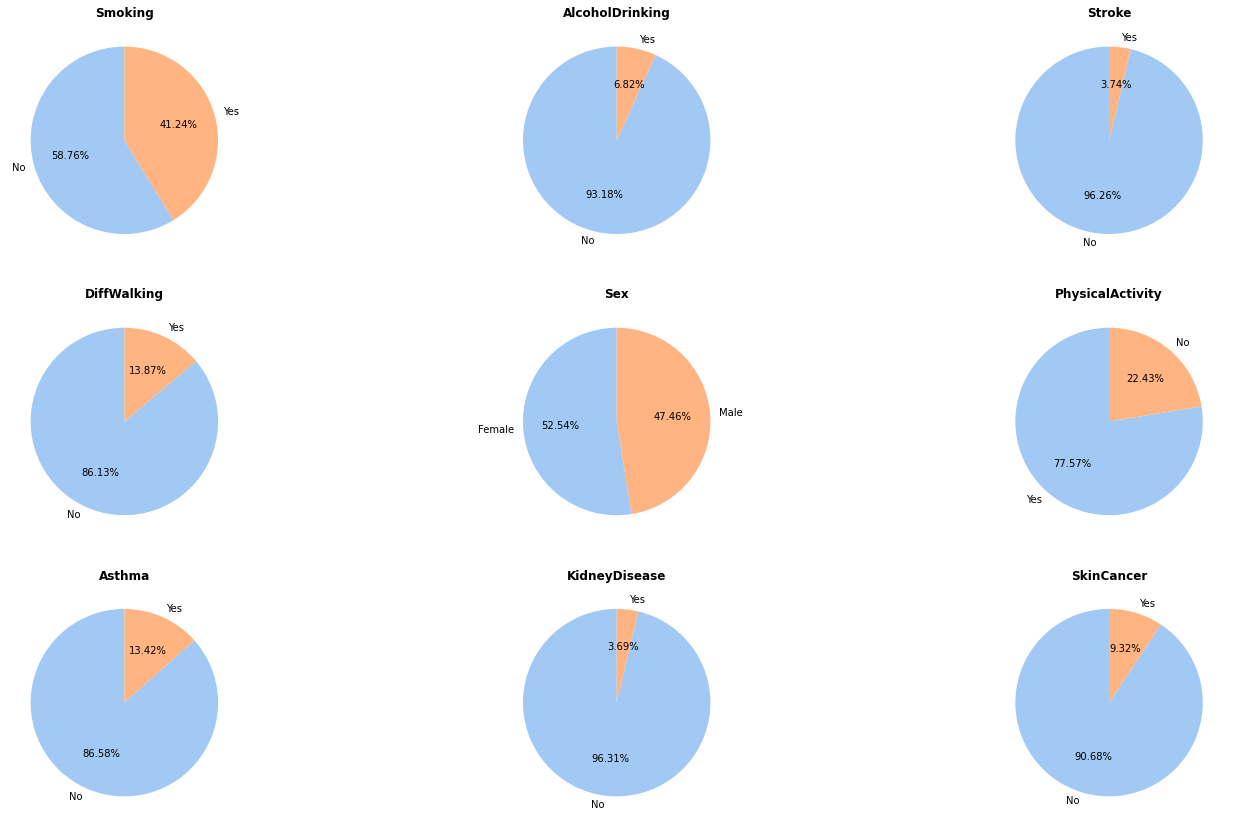

In [ ]:
plt.figure(figsize = (25,25))
for i,col in enumerate(['Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']):
    plt.subplot(5,3,i+1)
    colors = sns.color_palette('pastel')
    df1 = pd.DataFrame(dftrain[col].value_counts().reset_index())
    plt.pie(data=df1,x= col,labels='index',startangle = 90, autopct='%.2f%%', colors = colors)
    plt.title(col,weight = 'bold', color = 'black')

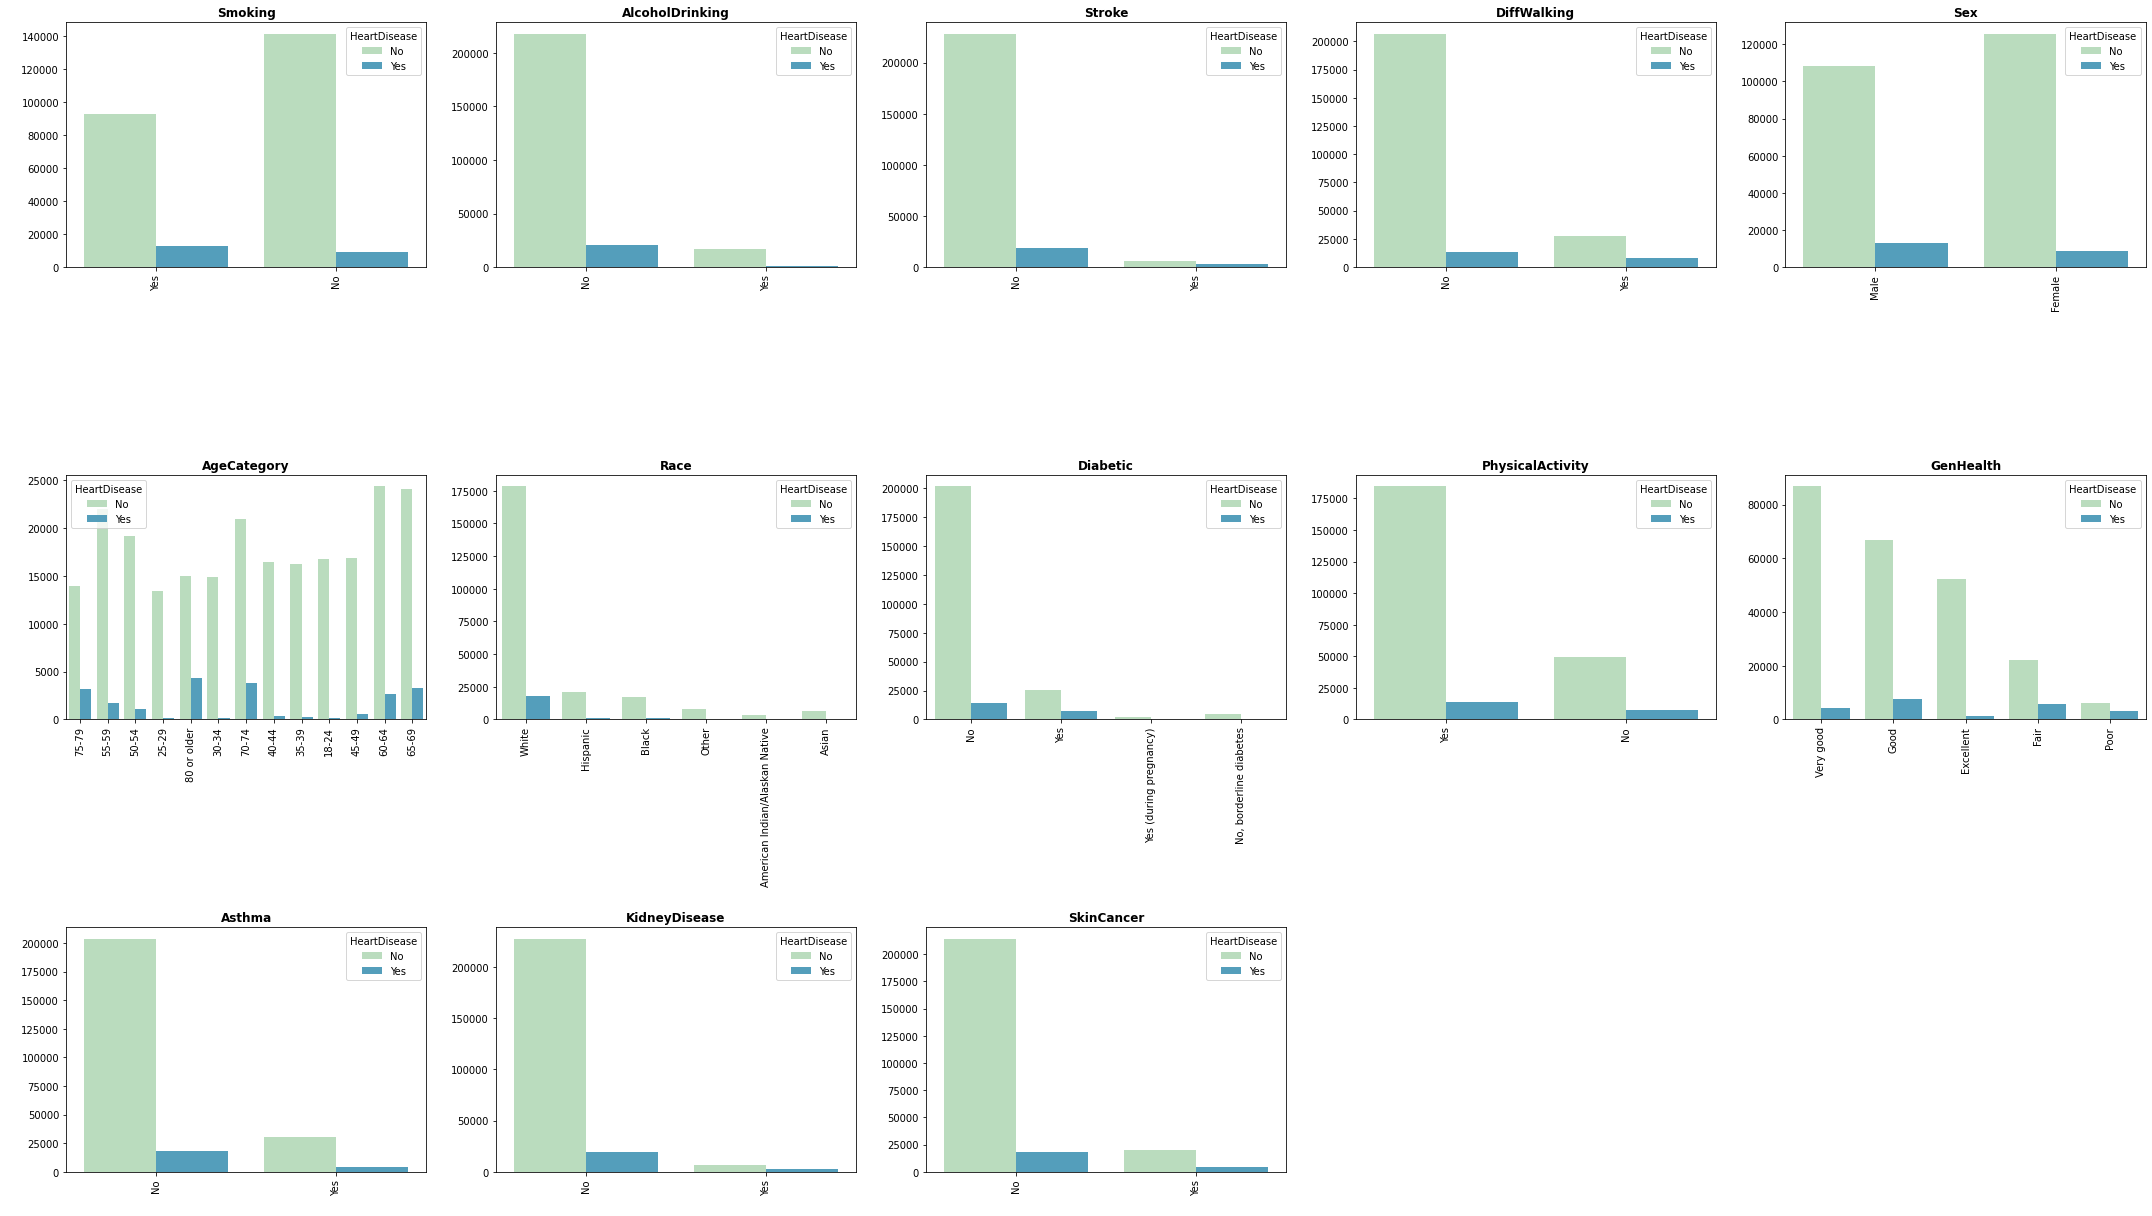

In [ ]:
plt.figure(figsize = (30,17))
for i,col in enumerate(['Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']):
    plt.subplot(3,5,i+1)
    sns.countplot(data = dftrain , x = col, palette = 'GnBu',hue = 'HeartDisease' )
    plt.title(col,weight = 'bold', color = 'black')
    plt.xticks(rotation=90)
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.tight_layout()

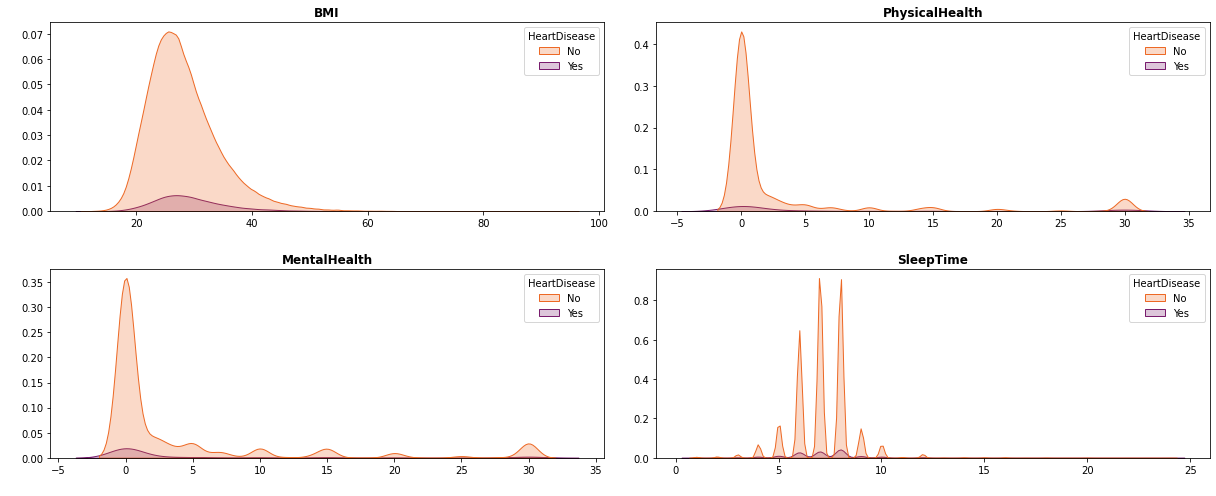

In [ ]:
plt.figure(figsize = (17,7))

for i,col in enumerate(['BMI','PhysicalHealth','MentalHealth','SleepTime']):

  plt.subplot(2,2,i+1)
  sns.kdeplot(data = df_train , x = col, palette = 'inferno_r', hue = 'HeartDisease', shade = True)
  plt.title(col,weight = 'bold', color = 'black')
  plt.ylabel(" ")
  plt.xlabel(" ")
  plt.tight_layout()

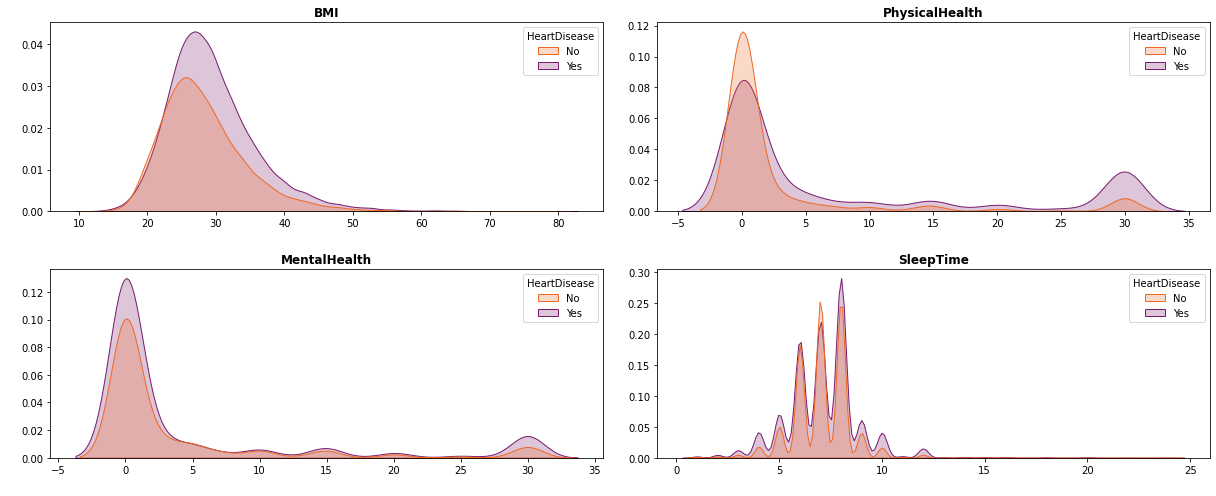

In [ ]:
df_train_mod = df_train.copy()
#df1 = df.sample(frac =.7)
df_train_mod0 = df_train_mod.loc[df['HeartDisease'] == 'No'].sample(frac =.0672)
df_train_mod1 =df_train_mod.loc[df['HeartDisease'] == 'Yes']
frames = [df_train_mod0, df_train_mod1]
df_train_mod_tot = pd.concat(frames)
plt.figure(figsize = (17,7))

for i,col in enumerate(['BMI','PhysicalHealth','MentalHealth','SleepTime']):

  plt.subplot(2,2,i+1)
  sns.kdeplot(data = df_train_mod_tot , x = col, palette = 'inferno_r', hue = 'HeartDisease', shade = True)
  plt.title(col,weight = 'bold', color = 'black')
  plt.ylabel(" ")
  plt.xlabel(" ")
  plt.tight_layout()

In [ ]:
dftrain =  dftrain[dftrain.columns].replace({'Yes':'1', 'No':'0', 'Male':1,'Female':0,\
                                             'Very good':5, 'Good':4, 'Excellent':3,\
                                             'Fair':2 , 'Poor':1, 'Male':1, 'Female':0,\
                                             'White':0, 'Hispanic':1, 'Black':2, 'Other':3,\
                                             'American Indian/Alaskan Native':4, 'Asian':5,\
                                             'Yes (during pregnancy)':1, 'No, borderline diabetes':0,
                                             '18-24':1, '25-29':2, '30-34':3, '35-39':4,\
                                             '40-44':5, '45-49':6,'50-54':7, '55-59':8, '60-64':9, '65-69':10,\
                                             '70-74':11, '75-79':12, '80 or older':13})
for i,col in enumerate(['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','PhysicalActivity',\
                        'Asthma','KidneyDisease','SkinCancer','GenHealth', 'Sex','Race','Diabetic','AgeCategory']):
  dftrain[col] = dftrain[col].astype(int)
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255836 entries, 95877 to 121958
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      255836 non-null  int64  
 1   BMI               255836 non-null  float64
 2   Smoking           255836 non-null  int64  
 3   AlcoholDrinking   255836 non-null  int64  
 4   Stroke            255836 non-null  int64  
 5   PhysicalHealth    255836 non-null  float64
 6   MentalHealth      255836 non-null  float64
 7   DiffWalking       255836 non-null  int64  
 8   Sex               255836 non-null  int64  
 9   AgeCategory       255836 non-null  int64  
 10  Race              255836 non-null  int64  
 11  Diabetic          255836 non-null  int64  
 12  PhysicalActivity  255836 non-null  int64  
 13  GenHealth         255836 non-null  int64  
 14  SleepTime         255836 non-null  float64
 15  Asthma            255836 non-null  int64  
 16  KidneyDisease   

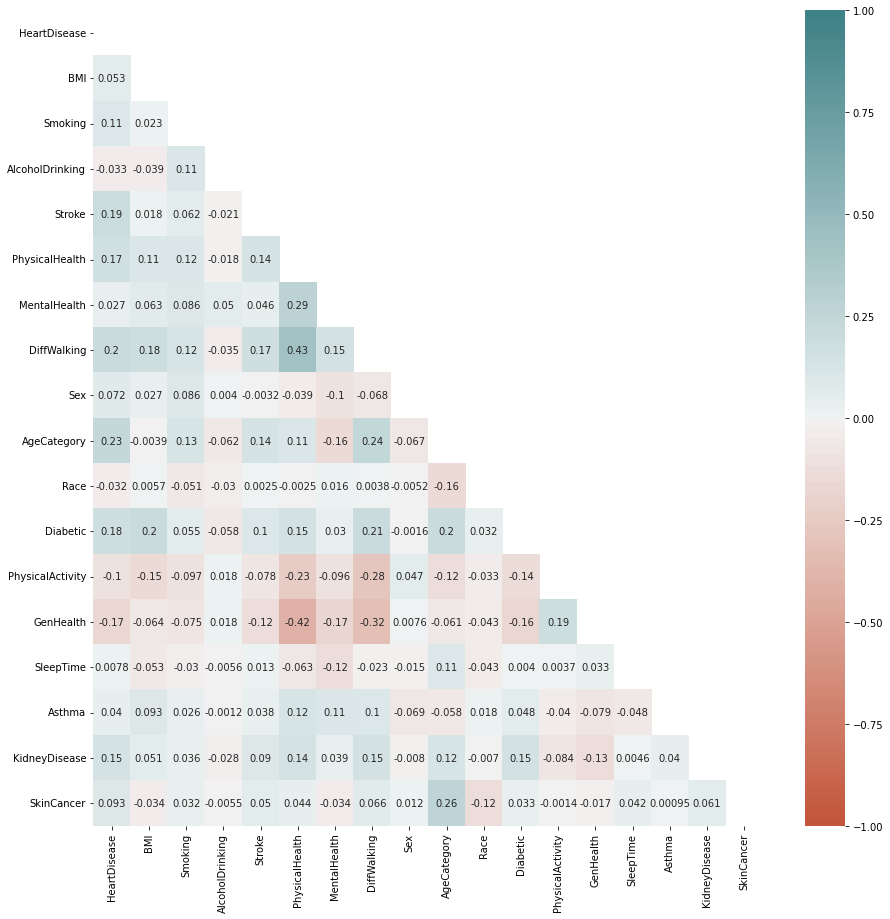

In [ ]:
corr_mat = dftrain.corr()

plt.figure(figsize=(15,15))
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 200, n=200), annot = True, mask = mask)



In [ ]:
corr_mat["HeartDisease"].sort_values(ascending=False)

HeartDisease        1.000000
AgeCategory         0.233225
DiffWalking         0.202147
Stroke              0.194949
Diabetic            0.176757
PhysicalHealth      0.171283
KidneyDisease       0.145840
Smoking             0.107845
SkinCancer          0.093149
Sex                 0.072051
BMI                 0.052843
Asthma              0.040402
MentalHealth        0.027226
SleepTime           0.007824
Race               -0.031980
AlcoholDrinking    -0.032734
PhysicalActivity   -0.100227
GenHealth          -0.168914
Name: HeartDisease, dtype: float64

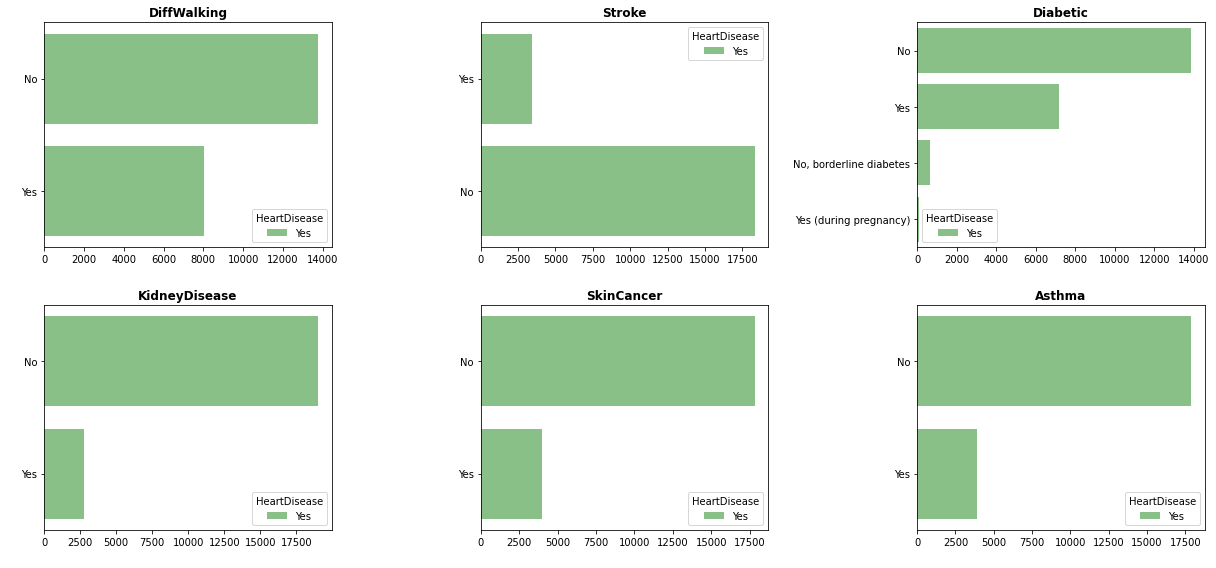

In [ ]:
body_problems = df_train[['HeartDisease','DiffWalking', 'Stroke', 'Diabetic', 'KidneyDisease', 'SkinCancer','Asthma']]
body_problems =  body_problems[body_problems['HeartDisease'] == 'Yes']

plt.figure(figsize = (17,8))
for i,col in enumerate(['DiffWalking', 'Stroke', 'Diabetic', 'KidneyDisease', 'SkinCancer','Asthma']):
    plt.subplot(2,3,i+1)
    sns.countplot(data = body_problems , y = col, palette = 'Accent',hue = 'HeartDisease' )
    plt.title(col,weight = 'bold', color = 'black')
    #plt.xticks(rotation=60)
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.tight_layout()

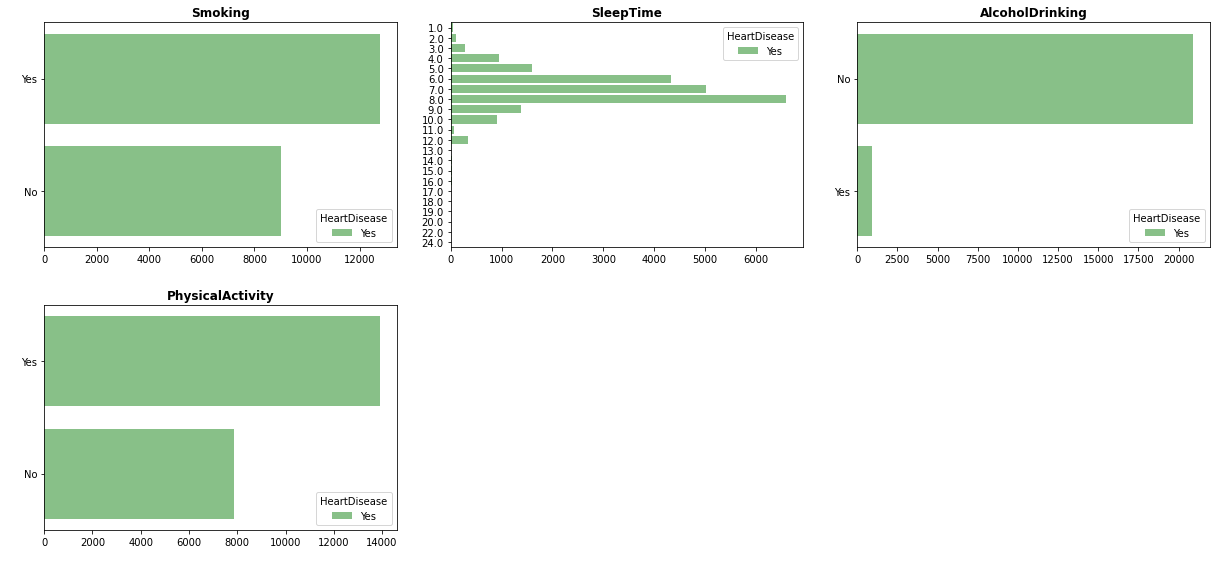

In [ ]:
body_habit = df_train[['HeartDisease','Smoking', 'SleepTime', 'AlcoholDrinking', 'PhysicalActivity']]
body_habit =  body_habit[body_habit['HeartDisease'] == 'Yes']

plt.figure(figsize = (17,8))
for i,col in enumerate(['Smoking', 'SleepTime', 'AlcoholDrinking', 'PhysicalActivity']):
    plt.subplot(2,3,i+1)
    sns.countplot(data = body_habit , y = col, palette = 'Accent',hue = 'HeartDisease' )
    plt.title(col,weight = 'bold', color = 'black')
    #plt.xticks(rotation=60)
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.tight_layout()

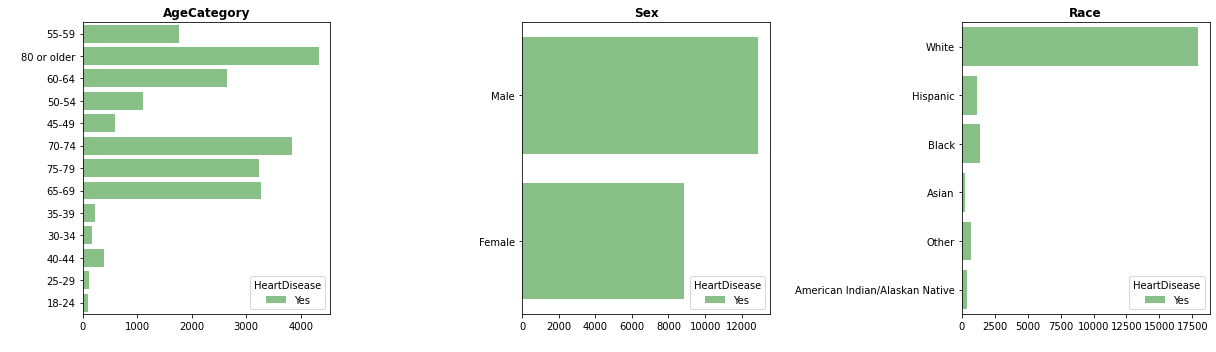

In [ ]:
category_group = df_train[['HeartDisease','AgeCategory', 'Sex', 'Race']]
category_group =  category_group[category_group['HeartDisease'] == 'Yes']

plt.figure(figsize = (17,5))
for i,col in enumerate(['AgeCategory', 'Sex', 'Race']):
    plt.subplot(1,3,i+1)
    sns.countplot(data = category_group , y = col, palette = 'Accent',hue = 'HeartDisease' )
    plt.title(col,weight = 'bold', color = 'black')
    #plt.xticks(rotation=60)
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.tight_layout()

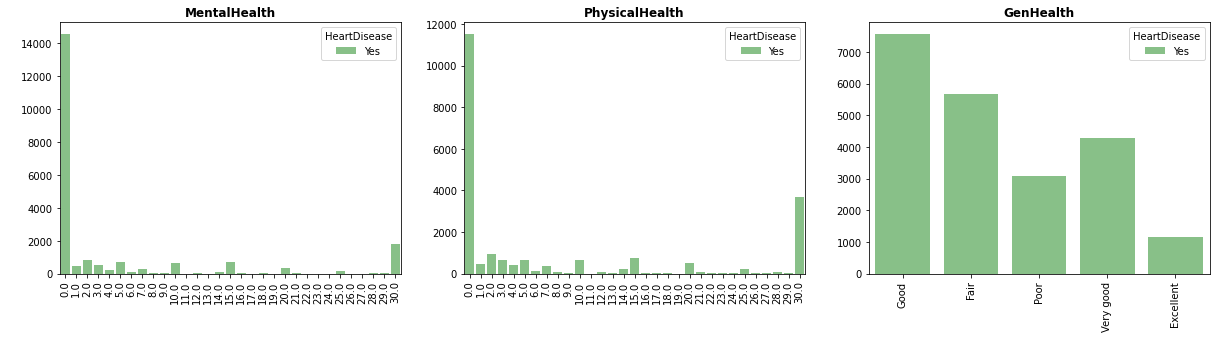

In [ ]:
body_health = df_train[['HeartDisease','MentalHealth', 'PhysicalHealth','GenHealth']]
body_health =  body_health[body_health['HeartDisease'] == 'Yes']

plt.figure(figsize = (17,5))
for i,col in enumerate(['MentalHealth', 'PhysicalHealth','GenHealth']):
    plt.subplot(1,3,i+1)
    sns.countplot(data = body_health , x = col, palette = 'Accent',hue = 'HeartDisease' )
    plt.title(col,weight = 'bold', color = 'black')
    plt.xticks(rotation=90)
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.tight_layout()

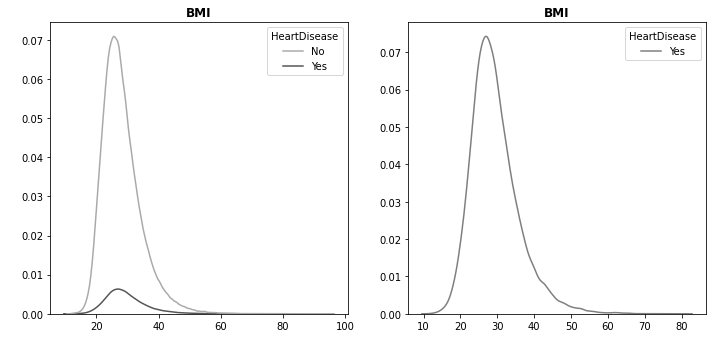

In [ ]:
body_bmi = df_train[['HeartDisease','BMI']]
body_bmi =  body_bmi[body_bmi['HeartDisease'] == 'Yes']
plt.figure(figsize = (10,5))
for i,col in enumerate([df_train,body_bmi]):
  plt.subplot(1,2,i+1)
  sns.kdeplot(data = col , x = 'BMI', palette = 'gist_gray_r',hue = 'HeartDisease' )
  plt.title('BMI',weight = 'bold', color = 'black')
  #plt.xticks(rotation=60)
  plt.ylabel(" ")
  plt.xlabel(" ")
  plt.tight_layout()

In [ ]:
meandf = df_train.groupby("HeartDisease").mean()
meandf['BMI']

HeartDisease
No     28.228878
Yes    29.433742
Name: BMI, dtype: float64

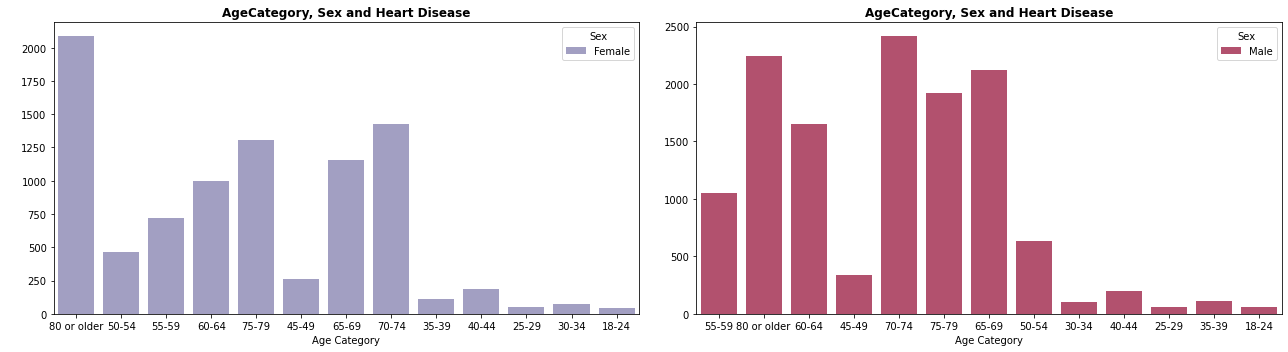

In [ ]:
age_gender = df_train[['HeartDisease','Sex','AgeCategory']]
age_gender =  age_gender[age_gender['HeartDisease'] == 'Yes']
age_male = age_gender[age_gender['Sex'] == 'Male']
age_female = age_gender[age_gender['Sex'] == 'Female']
plt.figure(figsize = (18,5))
flag = 0
for i,col in enumerate([age_female,age_male]):
  plt.subplot(1,2,i+1)
  if flag == 0:
    sns.countplot(data = col , x = 'AgeCategory', palette = 'Purples',hue = 'Sex' )
    flag = 1
  else:
    sns.countplot(data = col , x = 'AgeCategory', palette = 'flare_r',hue = 'Sex' )

  plt.title('AgeCategory, Sex and Heart Disease',weight = 'bold', color = 'black')
  #plt.xticks(rotation=60)
  plt.ylabel(" ")
  plt.xlabel("Age Category")
  plt.tight_layout()

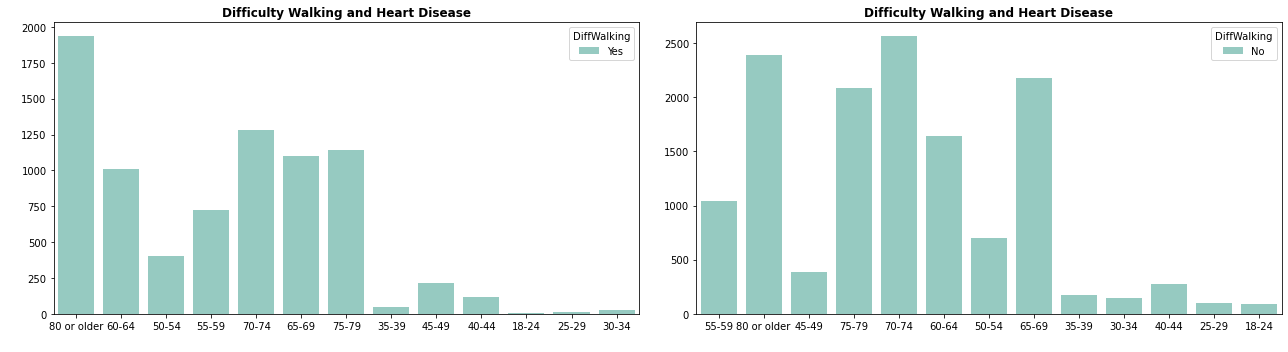

In [ ]:

age_walk = df_train[['HeartDisease','DiffWalking','AgeCategory']]
age_walk =  age_walk[age_walk['HeartDisease'] == 'Yes']
walkdiff_y = age_walk[age_walk['DiffWalking'] == 'Yes']
walkdiff_n = age_walk[age_walk['DiffWalking'] == 'No']
plt.figure(figsize = (18,5))
for i,col in enumerate([walkdiff_y,walkdiff_n]):
  plt.subplot(1,2,i+1)
  sns.countplot(data = col , x = 'AgeCategory', palette = 'Set3',hue = 'DiffWalking' )
  plt.title('Difficulty Walking and Heart Disease',weight = 'bold', color = 'black')
  #plt.xticks(rotation=60)
  plt.ylabel(" ")
  plt.xlabel(" ")
  plt.tight_layout()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255836 entries, 95877 to 121958
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      255836 non-null  object 
 1   BMI               255836 non-null  float64
 2   Smoking           255836 non-null  object 
 3   AlcoholDrinking   255836 non-null  object 
 4   Stroke            255836 non-null  object 
 5   PhysicalHealth    255836 non-null  float64
 6   MentalHealth      255836 non-null  float64
 7   DiffWalking       255836 non-null  object 
 8   Sex               255836 non-null  object 
 9   AgeCategory       255836 non-null  object 
 10  Race              255836 non-null  object 
 11  Diabetic          255836 non-null  object 
 12  PhysicalActivity  255836 non-null  object 
 13  GenHealth         255836 non-null  object 
 14  SleepTime         255836 non-null  float64
 15  Asthma            255836 non-null  object 
 16  KidneyDisease   

Text(0.5, 1.0, 'Correlation with Heart Disease')

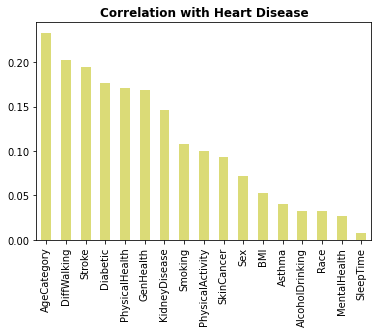

In [ ]:
sns.set_palette('gist_stern_r')
abs(corr_mat['HeartDisease']).sort_values(ascending= False)[1:].plot.bar()
df_train.info()
plt.title('Correlation with Heart Disease',weight = 'bold', color = 'black')

In [ ]:
corr_target = 0.4
#df_corr = corr_mat.where(corr_mat.abs().gt(0.15)).reset_index().melt('index').dropna()
df_corr = corr_mat.reset_index().melt('index').dropna()
df_corr = df_corr[abs(df_corr['value']) > corr_target]
df_corr = df_corr[df_corr['value'] != 1.]
df11, df22=  np.array_split(df_corr, 2)
df11

,index,variable,value
97,DiffWalking,PhysicalHealth,0.429025
103,GenHealth,PhysicalHealth,-0.419133


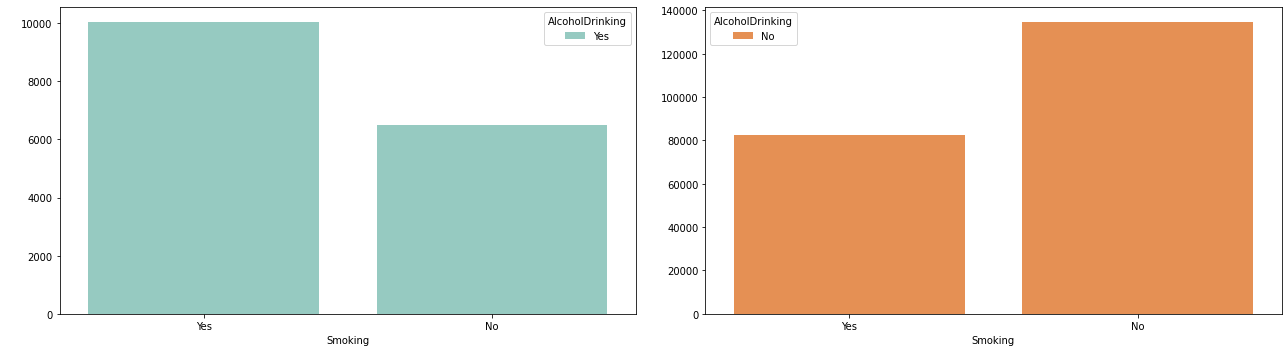

In [ ]:
var2 = 'Smoking'
var1 = 'AlcoholDrinking'



df_var = df_train[['HeartDisease',var1,var2]]
df_var =  df_var[df_var['HeartDisease'] == 'No']
var_y = df_var[df_var[var1] == 'Yes']
var_n = df_var[df_var[var1] == 'No']
plt.figure(figsize = (18,5))
flag = 0
for i,col in enumerate([var_y,var_n]):
  plt.subplot(1,2,i+1)

  if flag == 0:
    sns.countplot(data = col , x = var2, palette = 'Set3',hue = var1 )
    flag = 1
  else:
    sns.countplot(data = col , x = var2, palette = 'Oranges',hue = var1 )

  #plt.xticks(rotation=60)
  plt.ylabel(" ")
  plt.xlabel("Smoking")
  plt.tight_layout()
  #plt.title(' Smoking, AlcoholDrinking and Heart Disease',weight = 'bold', color = 'black')